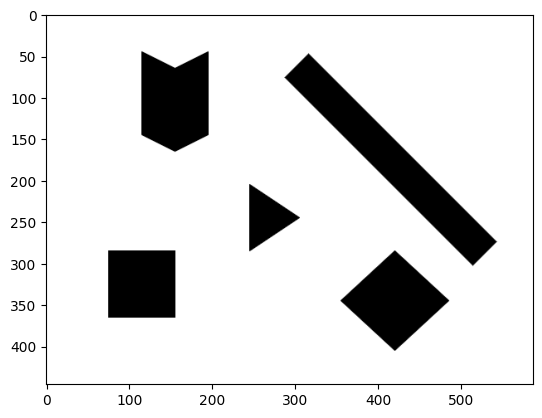

In [1]:
import matplotlib.pyplot as plt
from eval_metrics import cal_bend, cal_path_length
plt.imshow(plt.imread("./generated_images/o3.png"))

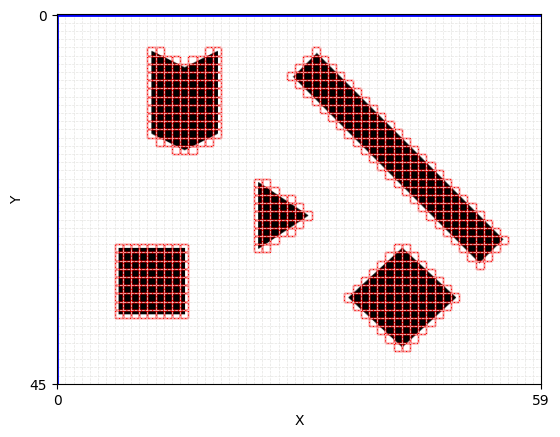

In [2]:
# Import necessary custom-built classes and methods
# from utils.obstacle_space import Map
from obstacle.obstacle_map import Map
from a_star.explorer import Explorer
from a_star.search import astar_search, path_states, dynamic_weighted_astar_search
import time

map = Map(image_path='./generated_images/o3.png', grid_size=10)
map.draw_coordinate_system()

In [3]:
initial=(0,0)
goal=(map.x_lim - 1, map.y_lim -1)

# Initialize the explorer class
explorer = Explorer(map=map, initial=initial, goal=goal)
# Check validity of start and goal nodes

if map.is_obstacle_in_grid(initial[0], initial[1]):
    print('Start lie in obstacle space!!\nPlease try again')

if map.is_obstacle_in_grid(goal[0], goal[1]):
    print('Goal lie in obstacle space!!\nPlease try again')

Reached: 243
Elapsed Time: 0.00815582275390625 seconds
Bends:  5
Path length:  79.15432893255067


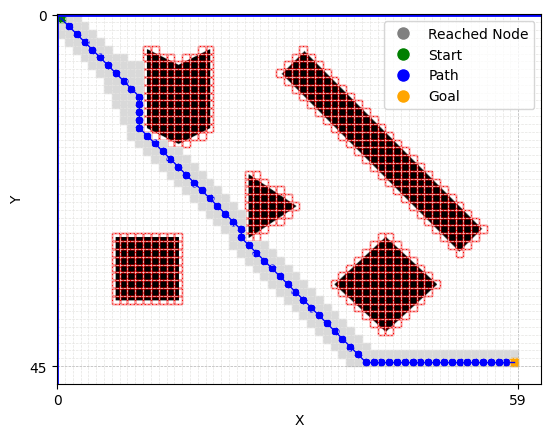

In [4]:
start_time = time.time()
node = astar_search(explorer)
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Reached: {len(explorer.reached.keys())}")
print(f"Elapsed Time: {elapsed_time} seconds")
states = path_states(node)

print("Bends: ", cal_bend(states))
print("Path length: ", cal_path_length(states))

map.draw_path_found(states, initial, goal, explorer.get_reached())

Reached:  233
Elapsed Time: 0.009593009948730469 seconds
Bends:  5
Path length:  79.15432893255067


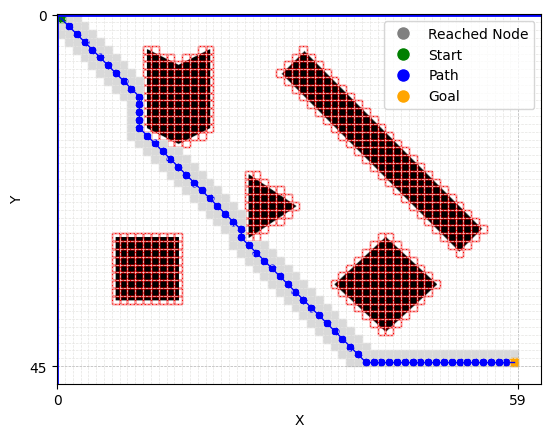

In [5]:
from math import sqrt
def h(node):
    h1 = abs(goal[0] - node.state[0])
    h2 = abs(goal[1] - node.state[1])
    return h1 + h2 + (sqrt(2) - 2) * min(h1, h2)

start_time = time.time()
node = dynamic_weighted_astar_search(explorer, h=h)
end_time = time.time()
# Calculate the elapsed time
elapsed_time = end_time - start_time
path = path_states(node)

print("Reached: ", len(explorer.reached.keys()))
print(f"Elapsed Time: {elapsed_time} seconds")
print("Bends: ", cal_bend(path))
print("Path length: ", cal_path_length(path))
map.draw_path_found(path, initial, goal, explorer.get_reached())

In [19]:
from path_smooth.path_smooth import simplify_path
from math import sqrt
def h(node):
    h1 = abs(goal[0] - node.state[0])
    h2 = abs(goal[1] - node.state[1])
    return h1 + h2 + (sqrt(2) - 2) * min(h1, h2)

start_time = time.time()
node = dynamic_weighted_astar_search(explorer, h=h)
path = path_states(node)
simplified_path = simplify_path(path, map)
end_time = time.time()

print("Reached: ", len(explorer.reached.keys()))
print(f"Elapsed Time: {end_time - start_time} seconds")
print("Bends: ", cal_bend(simplified_path))
print("Path length: ", cal_path_length(simplified_path))

Reached:  233
Elapsed Time: 0.4681119918823242 seconds
Bends:  5
Path length:  76.51361112688338


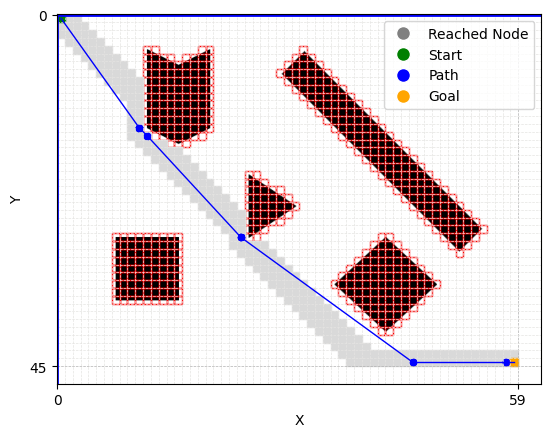

In [7]:
map.draw_path_found(simplified_path, initial, goal, explorer.get_reached())

**Genetic algorithm**

Finish Ant colony optimization, size of initial population:  622
------------Generation 1 -----------------
Population size:  622
Before selection, population size:  622
After selection, population size:  615
Before crossover, two first parents: 
[0, 60, 59, 118, 119, 61, 121, 63, 62, 120, 178, 238, 180, 239, 240, 299, 358, 298, 297, 355, 415, 357, 417, 418, 478, 477, 535, 536, 476, 534, 474, 475, 533, 592, 650, 710, 769, 770, 711, 653, 595, 596, 538, 479, 480, 421, 420, 362, 422, 481, 539, 599, 658, 718, 777, 836, 895, 955, 1014, 1074, 1015, 1075, 1135, 1136, 1194, 1253, 1193, 1252, 1311, 1251, 1191, 1250, 1310, 1370, 1312, 1372, 1373, 1314, 1374, 1434, 1375, 1435, 1436, 1494, 1554, 1555, 1615, 1675, 1735, 1795, 1737, 1797, 1856, 1855, 1796, 1736, 1678, 1738, 1798, 1739, 1740, 1741, 1742, 1802, 1862, 1863, 1804, 1803, 1744, 1745, 1687, 1688, 1630, 1690, 1691, 1692, 1750, 1749, 1689, 1631, 1632, 1573, 1633, 1634, 1635, 1636, 1637, 1638, 1698, 1758, 1818, 1878, 1938, 1998, 2058, 2116, 2

/Users/haily/Documents/GitHub/mobile_robot_path_planning/genetic/cal_smooth_value.py:15: RuntimeWarning: invalid value encountered in arccos
  angle_radians = np.arccos(cosine_theta)
/Users/haily/Documents/GitHub/mobile_robot_path_planning/genetic/cal_smooth_value.py:12: RuntimeWarning: invalid value encountered in scalar divide
  cosine_theta = dot_product / (norm_BA * norm_BC)


After deletion: [0, 953, 1014, 1616, 2265, 2575, 2654]
Mean fit_value:  -13378.30876280454
Mean path_value:  85.0996486665427
Mean smooth_value:  116.76315789473684
Best path:  [0, 2365, 2400, 2460, 2654]
------------Generation 3 -----------------
Population size:  608
Before selection, population size:  608
After selection, population size:  601
Before crossover, two first parents: 
[0, 198, 557, 736, 1035, 1627, 1638, 1758, 1878, 2654]
[0, 198, 557, 737, 1093, 1513, 1578, 1757, 1877, 1938, 2654]
After crossover, two first parents: 
[0, 198, 557, 737, 1093, 1513, 1578, 1757, 1877, 1938, 2654]
[0, 198, 557, 736, 1035, 1627, 1638, 1758, 1878, 2654]
Before mutation: [0, 198, 557, 737, 1093, 1513, 1578, 1757, 1877, 1938, 2654]
After mutation: [0, 895, 955, 1075, 1615, 1675, 1735, 2512, 2654]
Before insertion: [0, 895, 955, 1075, 1615, 1675, 1735, 2512, 2654]
After insertion: [0, 476, 953, 895, 1014, 1314, 1615, 1675, 1735, 1798, 1745, 1629, 1691, 1633, 1576, 1638, 1698, 1758, 1818, 1878, 

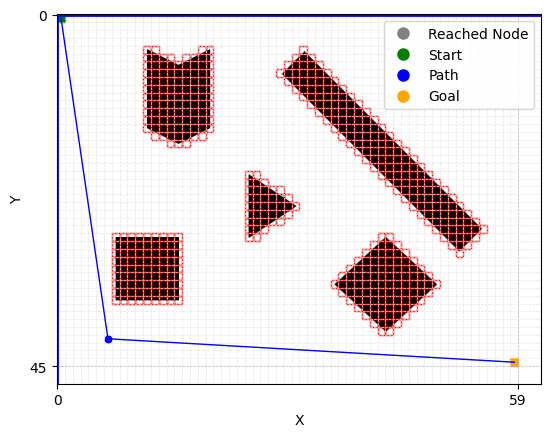

In [8]:
from genetic.genetic import genetic
from genetic.genetic import convert_path_to_xy
G = map.get_grid_matrix()
cols = G.shape[1]
start_time = time.time()
mean_path_value, mean_smooth_value, mean_fit_value, best_path = genetic(map, start=initial, end=goal,
                max_generation=10, ant_number=10, 
                p_crossover=1, p_mutation=0.05, verbose=True)
end_time = time.time()
path = convert_path_to_xy(best_path[-1], cols)
print("Elapsed time: ", end_time-start_time)
print("Bends: ", cal_bend(path))
print("Path length: ", cal_path_length(path))
map.draw_path_found(convert_path_to_xy(best_path[-1], cols), initial, goal, [])

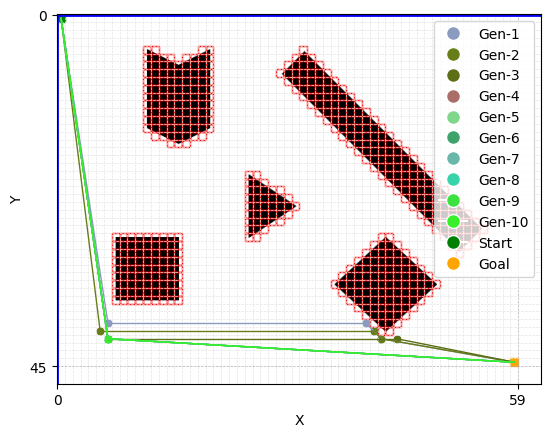

In [9]:
import numpy as np

plot_data = []
for index, path in enumerate(best_path):
    plot_data.append([convert_path_to_xy(path, cols), (np.random.rand(), np.random.rand(), np.random.rand()), f"Gen-{index+1}"])
map.draw_multiple_path_found(plot_data, initial, goal, [])


In [10]:
def scale_to_01(array):
    min_val = np.min(array)
    max_val = np.max(array)
    scaled_array = (array - min_val) / (max_val - min_val)
    return scaled_array

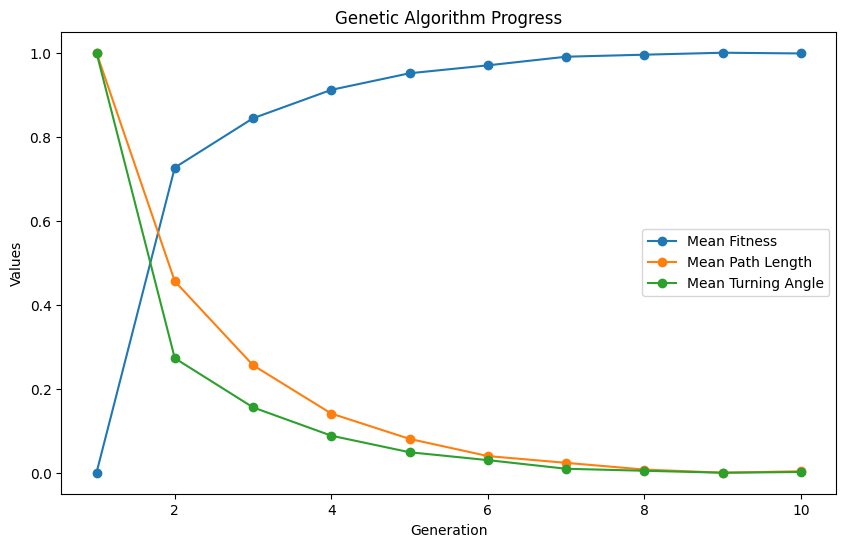

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
generations = np.arange(1, 11)  # Assuming 10 generations for the example

# Plotting all three values in one graph
plt.figure(figsize=(10, 6))

plt.plot(generations, scale_to_01(mean_fit_value), label='Mean Fitness', marker='o')
plt.plot(generations, scale_to_01(mean_path_value), label='Mean Path Length', marker='o')
plt.plot(generations, scale_to_01(mean_smooth_value), label='Mean Turning Angle', marker='o')


plt.title('Genetic Algorithm Progress')
plt.xlabel('Generation')
plt.ylabel('Values')
plt.legend()

# Display the plot
plt.show()


1st Generation and Last Generation

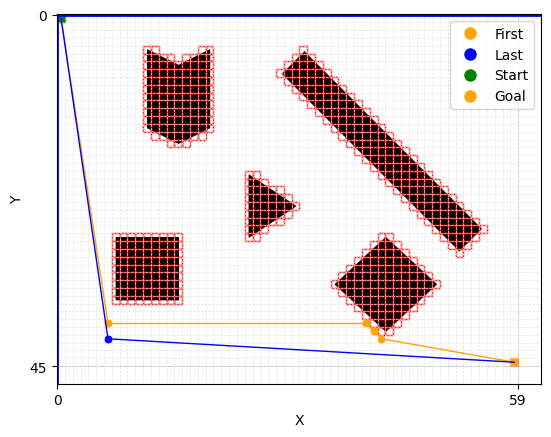

In [12]:
first = best_path[0]
last =  best_path[-1]
map.draw_multiple_path_found([
    [convert_path_to_xy(first, cols), 'orange', f"First"],
    [convert_path_to_xy(last, cols), 'blue', f"Last"],
], initial, goal, [])


In [13]:
from genetic.cal_smooth_value import cal_smooth_value
from genetic.cal_path_value import cal_path_value
new_population = [first, last]
path_value = cal_path_value(new_population, cols)
print('path_value: ', path_value)
smooth_value = cal_smooth_value(new_population, cols, verbose=True)
print('smooth_value: ', smooth_value)
fit_value = - path_value - smooth_value
print('fit_value: ', fit_value)

path_value:  [92.54994294 93.52316528]
Path 1
Angle 0 1 2:  98.74616226255522
Angle 1 2 3:  135.0
Angle 2 3 4:  179.99999879258172
Angle 3 4 5:  145.00797980144134
Path 2
Angle 0 1 2:  101.62751600486183
smooth_value:  [16.  4.]
fit_value:  [-108.54994294  -97.52316528]


Crossover from 2nd generation

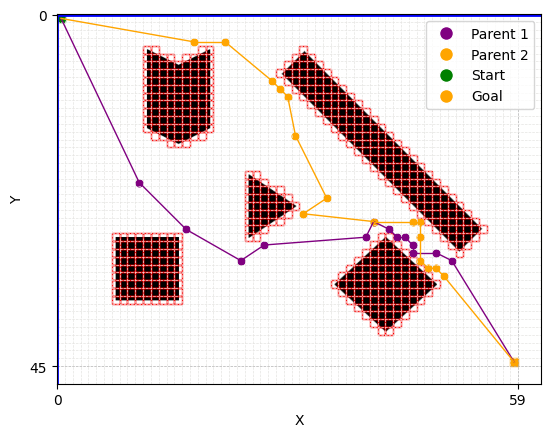

In [14]:
p1 = [0, 1249, 1609, 1852, 1737, 1691, 1574, 1635, 1695, 1696, 1756, 1815, 1818, 1879, 2654]
p2 = [0, 194, 198, 499, 559, 619, 915, 1391, 1506, 1574, 1579, 1580, 1698, 1875, 1935, 1936, 1996, 2654]
map.draw_multiple_path_found([
    [convert_path_to_xy(p1, cols), 'purple', 'Parent 1'], 
    [convert_path_to_xy(p2, cols), 'orange',  'Parent 2']],
    initial, goal, []
)

[0, 1249, 1609, 1852, 1737, 1691, 1574, 1579, 1580, 1698, 1875, 1935, 1936, 1996, 2654]
[0, 194, 198, 499, 559, 619, 915, 1391, 1506, 1574, 1635, 1695, 1696, 1756, 1815, 1818, 1879, 2654]


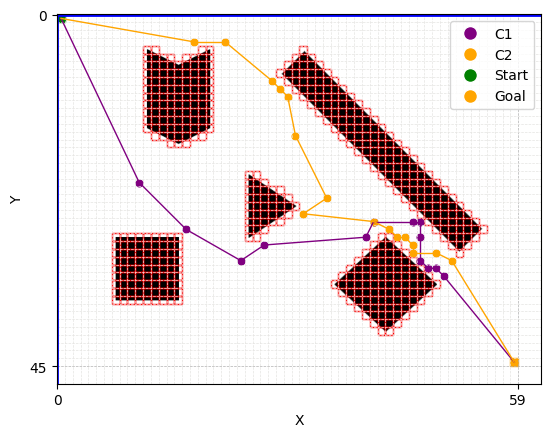

In [15]:
from genetic.crossover import crossover
children = crossover([p1, p2], p_crossover=1)

print(children[0])
print(children[1])
map.draw_multiple_path_found([
    [convert_path_to_xy(children[0], cols), 'purple', 'C1'],
    [convert_path_to_xy(children[1], cols), 'orange', 'C2']
], initial, goal, [])

[0, 1249, 1609, 1852, 1737, 1691, 1574, 1579, 1580, 1698, 1875, 1935, 1936, 1996, 2654]
[0, 1249, 1609, 1793, 1737, 1691, 1574, 1579, 1580, 1698, 1875, 1935, 1936, 1996, 2654]


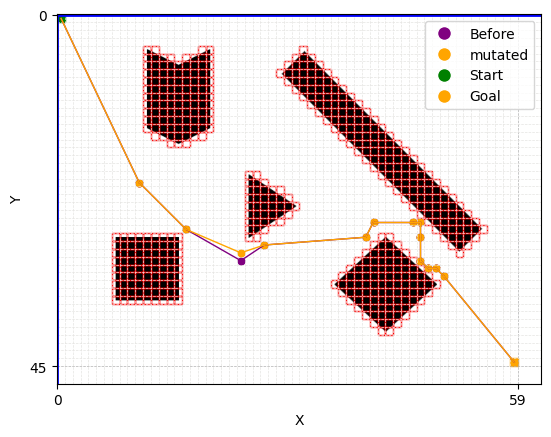

In [16]:
from genetic.mutation import mutation
mutated = mutation([children[0]], p_mutation=1, G=G)[0]
print(children[0])
print(mutated)
map.draw_multiple_path_found([
    [convert_path_to_xy(children[0], cols), 'purple', 'Before'],
    [convert_path_to_xy(mutated, cols), 'orange', 'mutated'],
    ], initial, goal, [])

[0, 1249, 1609, 1793, 1737, 1691, 1574, 1579, 1580, 1698, 1875, 1935, 1936, 1996, 2654]
[0, 595, 1249, 1429, 1609, 1671, 1793, 1737, 1691, 1631, 1574, 1517, 1579, 1580, 1638, 1698, 1758, 1875, 1935, 1936, 1996, 2295, 2654]


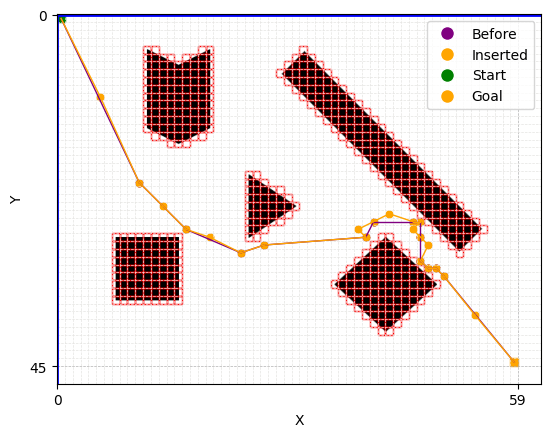

In [17]:
from genetic.insertion import insertion

inserted = insertion([mutated], G=G)[0]
print(mutated)
print(inserted)
map.draw_multiple_path_found([
    [convert_path_to_xy(mutated, cols), 'purple', 'Before'],
    [convert_path_to_xy(inserted, cols), 'orange', 'Inserted'],
], initial, goal, [])

[0, 595, 1249, 1429, 1609, 1671, 1793, 1737, 1691, 1631, 1574, 1517, 1579, 1580, 1638, 1698, 1758, 1875, 1935, 1936, 1996, 2295, 2654]
[0, 1249, 1609, 1793, 1737, 1691, 1574, 1638, 1758, 1936, 1996, 2654]


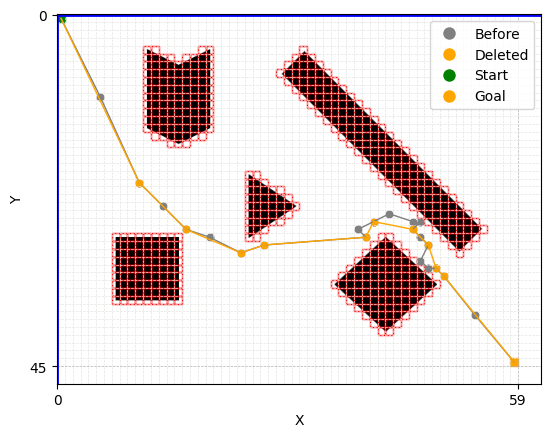

In [18]:
from genetic.deletion import deletion

deleted = deletion([inserted], map)[0]
print(inserted)
print(deleted)
map.draw_multiple_path_found([
    [convert_path_to_xy(inserted, cols), 'gray', 'Before'],
    [convert_path_to_xy(deleted, cols), 'orange', 'Deleted'],
], initial, goal, [])